## Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/supermarket_sales - Sheet1.csv")

## Preprocessing

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.shape

(1000, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Invoice ID'].nunique()

1000

In [ ]:
df = df.drop('Invoice ID', axis=1)

In [ ]:
#convert str to datetime
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
#add day, month, year columns
df['Day'] = (df['Date']).dt.day
df['Month'] = (df['Date']).dt.month
df['Year'] = (df['Date']).dt.year

In [ ]:
#convert str to datetime
df['Time'] = pd.to_datetime(df['Time'])

#add hour columns
df['Hour'] = (df['Time']).dt.hour

##**EDA**

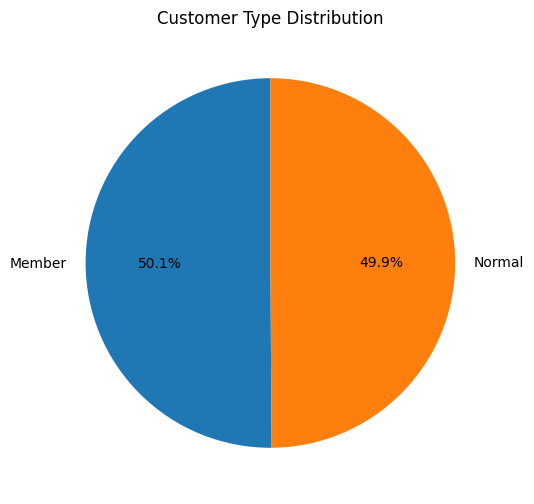

In [ ]:
customer_type_distribution = df['Customer type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(customer_type_distribution, labels=customer_type_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Type Distribution')
plt.show()

### Revenue over time

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
revenue_over_time = df.groupby('Date')['Total'].sum()

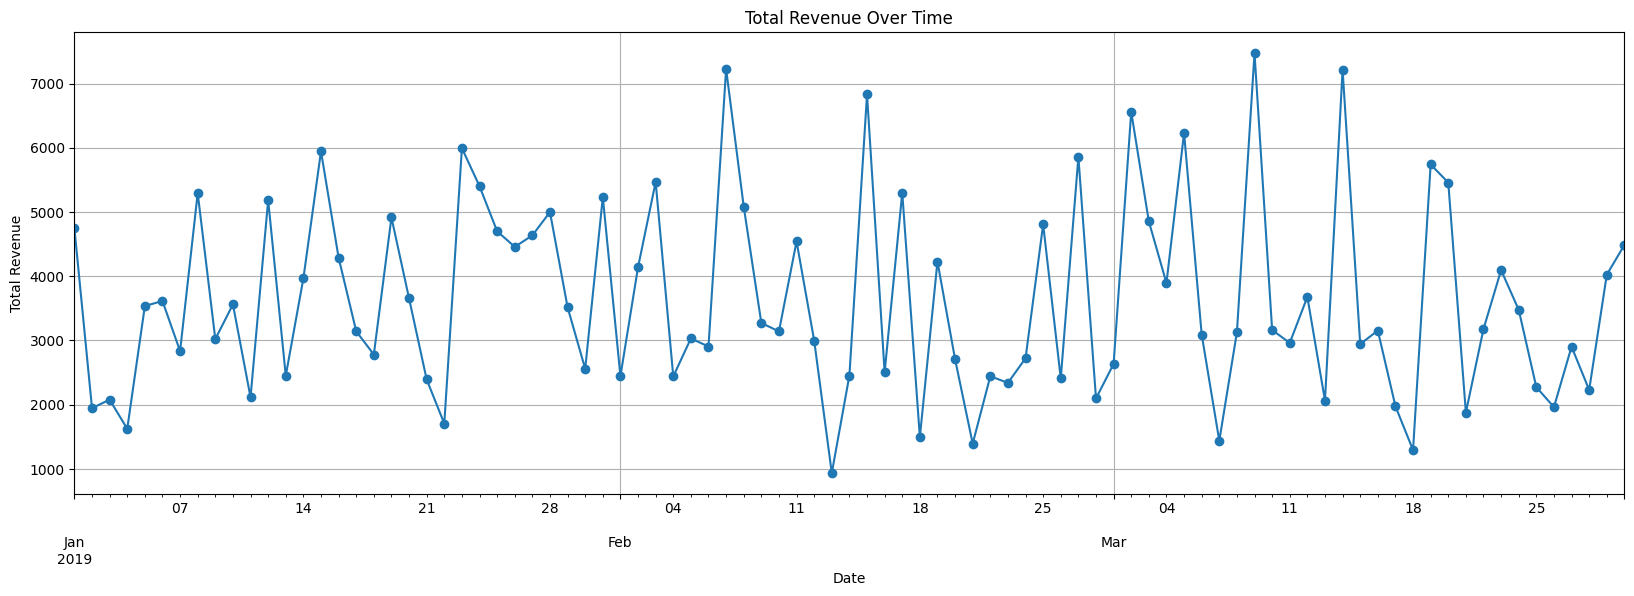

In [ ]:
plt.figure(figsize=(20, 6))
# plt.plot(revenue_over_time.index, revenue_over_time.values, marker='o', linestyle='-')
revenue_over_time.plot(marker='o', linestyle='-')
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

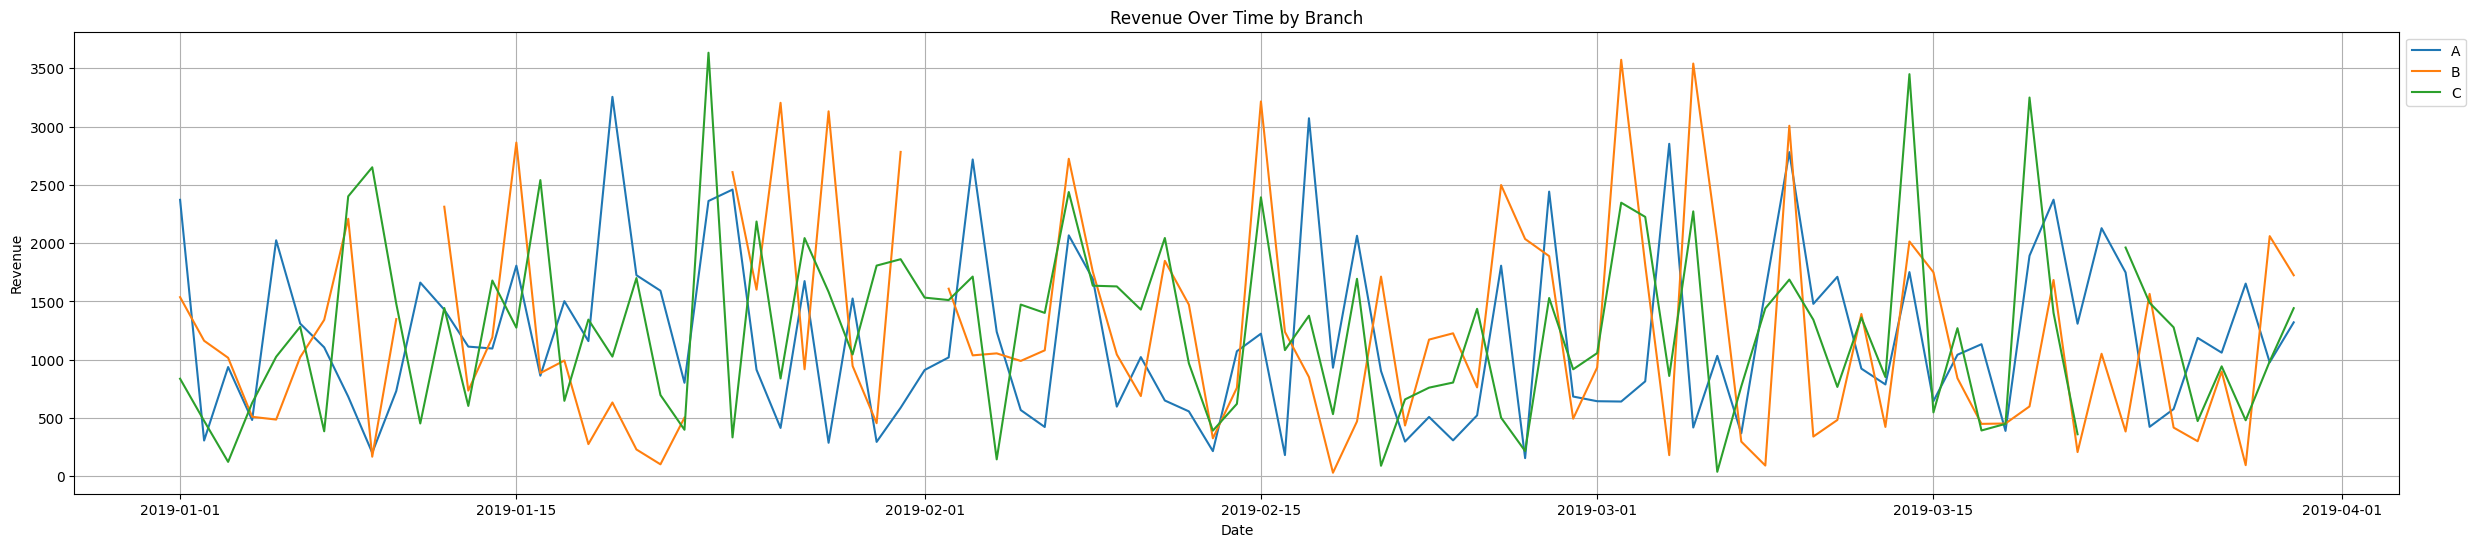

In [ ]:
revenue_over_time_by_branch = df.groupby(['Date', 'Branch'])['Total'].sum().unstack()

# Visualize revenue over time by branch (Line Chart)
plt.figure(figsize=(30, 6))
for branch in revenue_over_time_by_branch.columns:
    plt.plot(revenue_over_time_by_branch.index, revenue_over_time_by_branch[branch], label=branch)

plt.title('Revenue Over Time by Branch')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

cái này làm thử thôi :)))))))

### Profit margin

In [ ]:
total_gross_income = df['gross income'].sum()
total_revenue = df['Total'].sum()
profit_margin = (total_gross_income / total_revenue) * 100

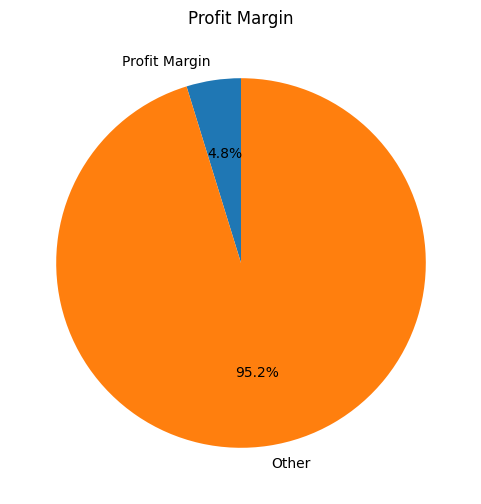

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie([profit_margin, 100 - profit_margin], labels=['Profit Margin', 'Other'], autopct='%1.1f%%', startangle=90)
plt.title('Profit Margin')
plt.show()

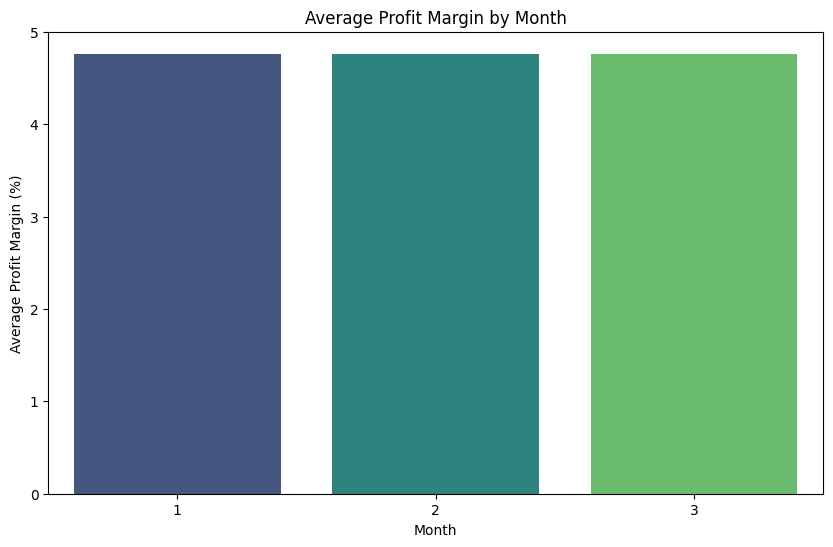

In [ ]:
# Calculate profit margin
df['ProfitMargin'] = (df['gross income'] / df['Total']) * 100

# Calculate average profit margin by month
average_profit_margin = df.groupby('Month')['ProfitMargin'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='ProfitMargin', data=average_profit_margin, palette='viridis')
plt.title('Average Profit Margin by Month')
plt.xlabel('Month')
plt.ylabel('Average Profit Margin (%)')
plt.show()


### Sale quantity by product lines

In [ ]:
sales_quantity_by_product_line = df.groupby('Product line')['Quantity'].sum()

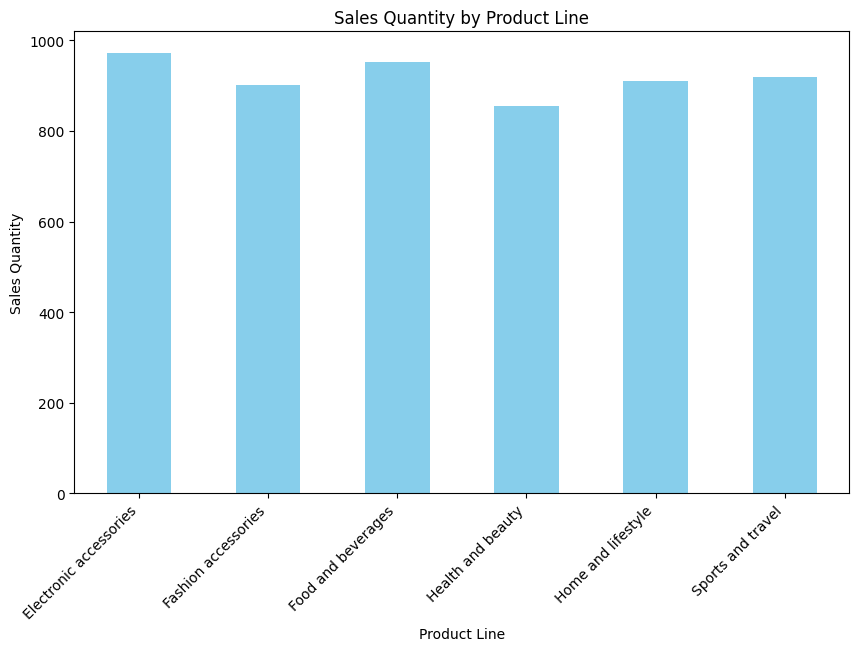

In [ ]:
plt.figure(figsize=(10, 6))
sales_quantity_by_product_line.plot(kind='bar', color='skyblue')
plt.title('Sales Quantity by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sales Quantity')
plt.xticks(rotation=45, ha='right')
plt.show()

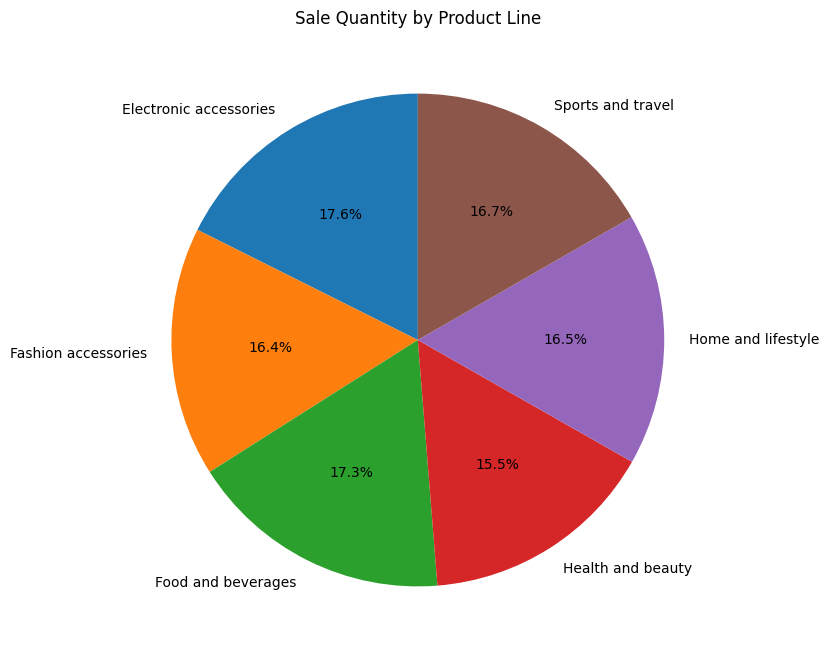

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(sales_quantity_by_product_line, labels=sales_quantity_by_product_line.index, autopct='%1.1f%%', startangle=90)
plt.title('Sale Quantity by Product Line')
plt.show()

- Đồ điện từ và F&B có lượng tiêu thụ lớn nhất nhưng chênh lệch giữa các ngành hàng không đáng kể


### Average unit price by product line

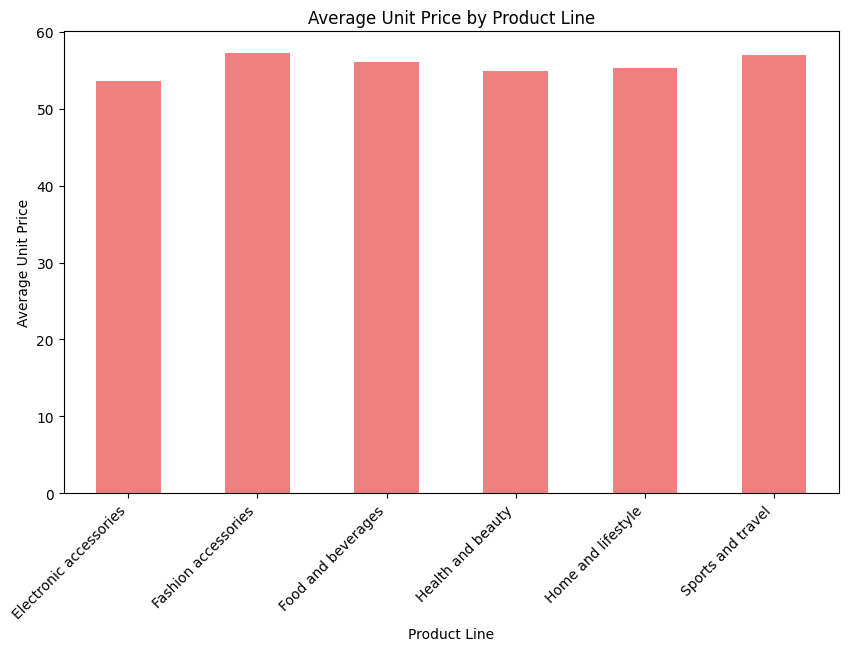

In [ ]:
average_unit_price_by_product_line = df.groupby('Product line')['Unit price'].mean()

plt.figure(figsize=(10, 6))
average_unit_price_by_product_line.plot(kind='bar', color='lightcoral')
plt.title('Average Unit Price by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: xlabel='Unit price', ylabel='Product line'>

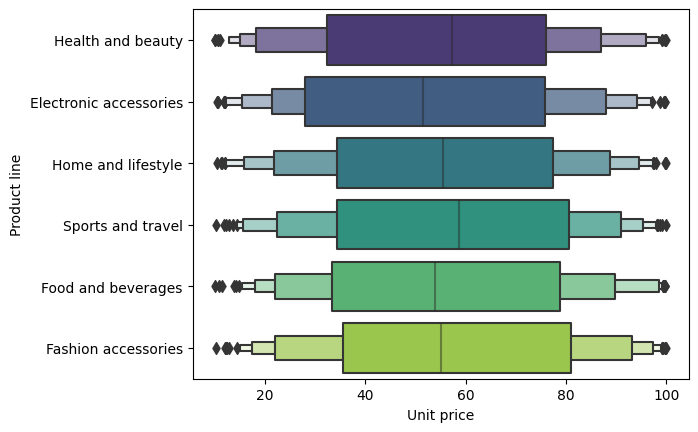

In [ ]:
sns.boxenplot(y = 'Product line', x = 'Unit price', data=df, palette='viridis')

### Average transaction value over time

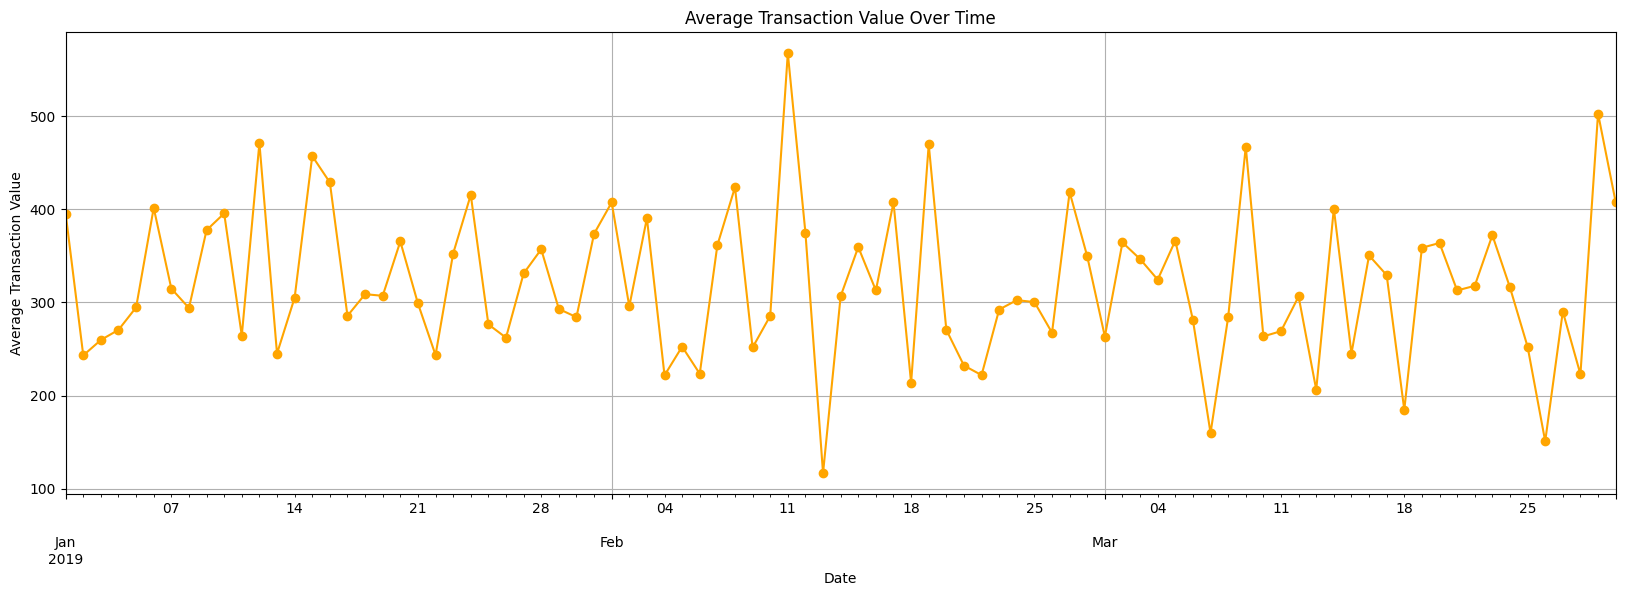

In [ ]:
average_transaction_value_over_time = df.groupby('Date')['Total'].mean()

plt.figure(figsize=(20, 6))
average_transaction_value_over_time.plot(marker='o', linestyle='-', color='orange')
plt.title('Average Transaction Value Over Time')
plt.xlabel('Date')
plt.ylabel('Average Transaction Value')
plt.grid(True)
plt.show()

### Sale growth

In [ ]:
# Calculate Sales Growth Over Time
sales_over_time = df.groupby('Date')['Total'].sum()

# Calculate the sales growth rate
sales_growth = sales_over_time.pct_change() * 100  # Percentage change from the previous period



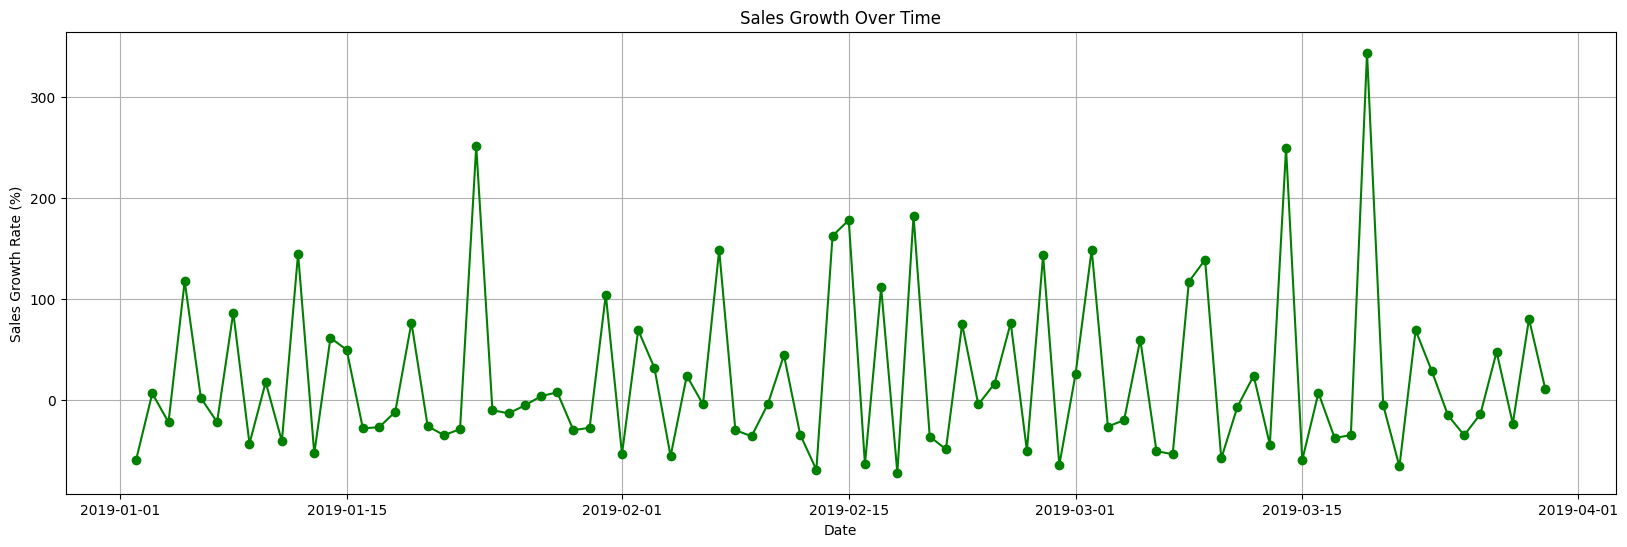

In [ ]:
# Visualize Sales Growth Over Time (Line Chart)
plt.figure(figsize=(20, 6))
plt.plot(sales_growth.index, sales_growth.values, marker='o', linestyle='-', color='green')
plt.title('Sales Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Growth Rate (%)')
plt.grid(True)
plt.show()

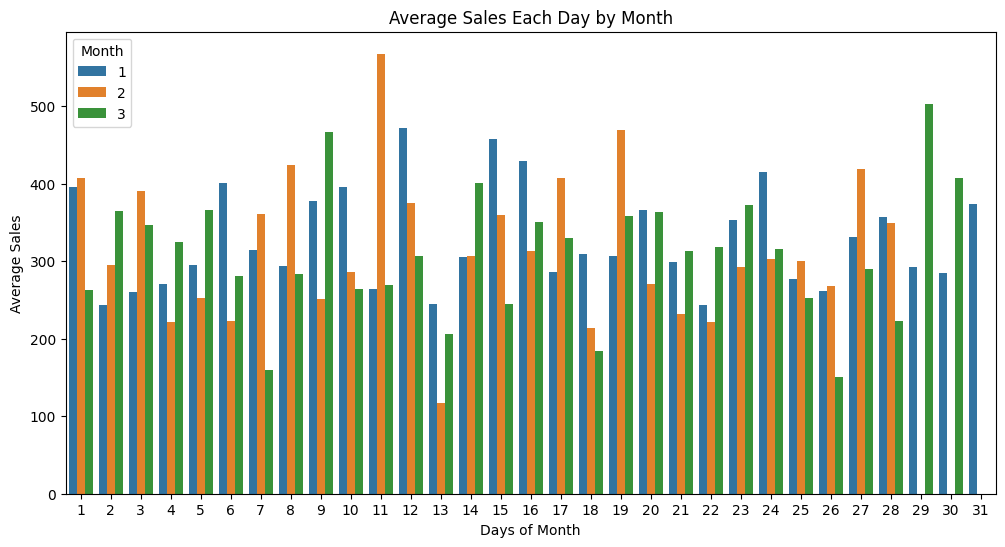

In [ ]:

# Calculate average sales each day by month
average_sales_by_day = df.groupby(['Month', 'Day'])['Total'].mean().reset_index()
# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Day', y='Total', hue='Month', data=average_sales_by_day)
plt.title('Average Sales Each Day by Month')
plt.xlabel('Days of Month')
plt.ylabel('Average Sales')
plt.show()

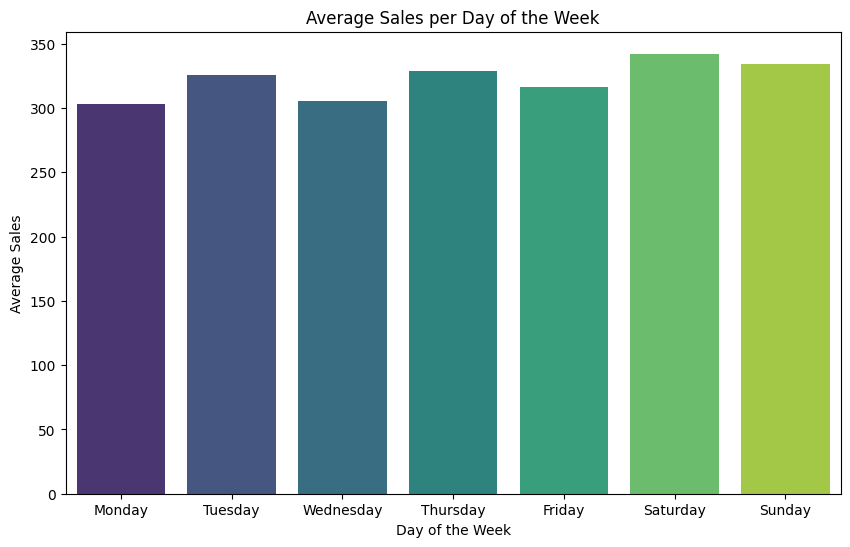

In [ ]:
# Extract day of the week from the 'Date' column
df['DayOfWeek'] = df['Date'].dt.day_name()

# Calculate average sales per day
average_sales_per_day = df.groupby('DayOfWeek')['Total'].mean().reset_index()

# Define the order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Total', data=average_sales_per_day, order=days_order, palette='viridis')
plt.title('Average Sales per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.show()

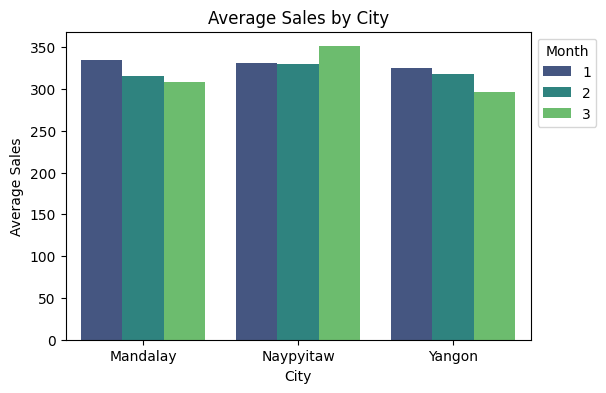

In [ ]:
# Calculate average sales by city and branch
average_sales_by_city_branch = df.groupby(['City','Month'])['Total'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(6,4))
sns.barplot(x='City', y='Total',hue='Month', data=average_sales_by_city_branch, palette='viridis')
plt.title('Average Sales by City')
plt.xlabel('City')
plt.ylabel('Average Sales')
plt.legend(title='Month', bbox_to_anchor=(1, 1))
plt.show()

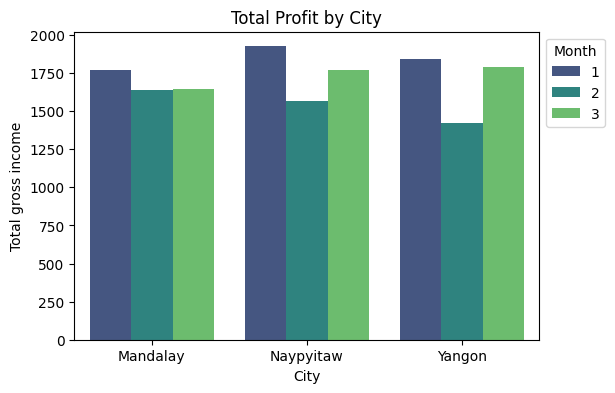

In [ ]:
# Calculate average profit by city and branch
profit_by_city_branch = df.groupby(['City','Month'])['gross income'].sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(6,4))
sns.barplot(x='City', y='gross income',hue='Month', data=profit_by_city_branch, palette='viridis')
plt.title('Total Profit by City')
plt.xlabel('City')
plt.ylabel('Total gross income')
plt.legend(title='Month', bbox_to_anchor=(1, 1))
plt.show()

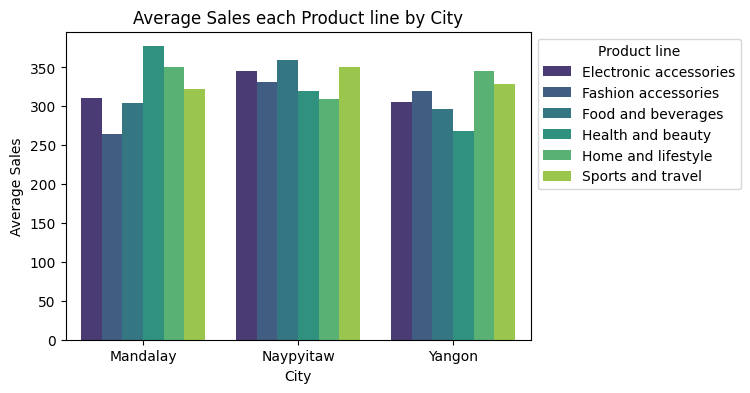

In [ ]:
# Calculate average sales by city and branch
average_sales_by_city_branch = df.groupby(['City','Product line'])['Total'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(6,4))
sns.barplot(x='City', y='Total',hue='Product line', data=average_sales_by_city_branch, palette='viridis')
plt.title('Average Sales each Product line by City')
plt.xlabel('City')
plt.ylabel('Average Sales')
plt.legend(title='Product line', bbox_to_anchor=(1, 1))
plt.show()

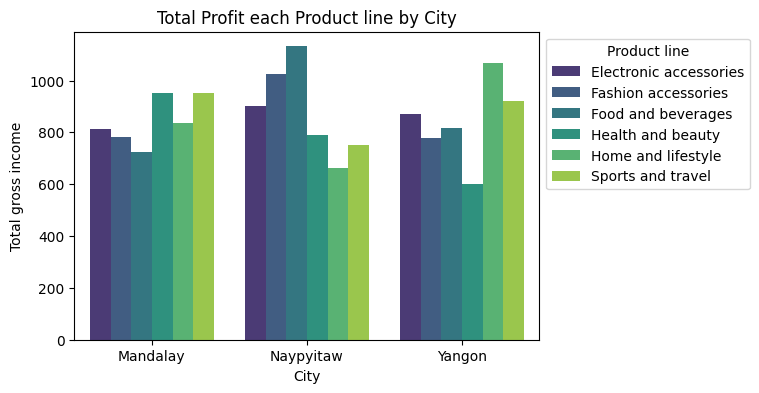

In [ ]:
# Calculate total profit by city and branch
profit_by_city_branch = df.groupby(['City','Product line'])['gross income'].sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(6,4))
sns.barplot(x='City', y='gross income',hue='Product line', data=profit_by_city_branch, palette='viridis')
plt.title('Total Profit each Product line by City')
plt.xlabel('City')
plt.ylabel('Total gross income')
plt.legend(title='Product line', bbox_to_anchor=(1, 1))
plt.show()

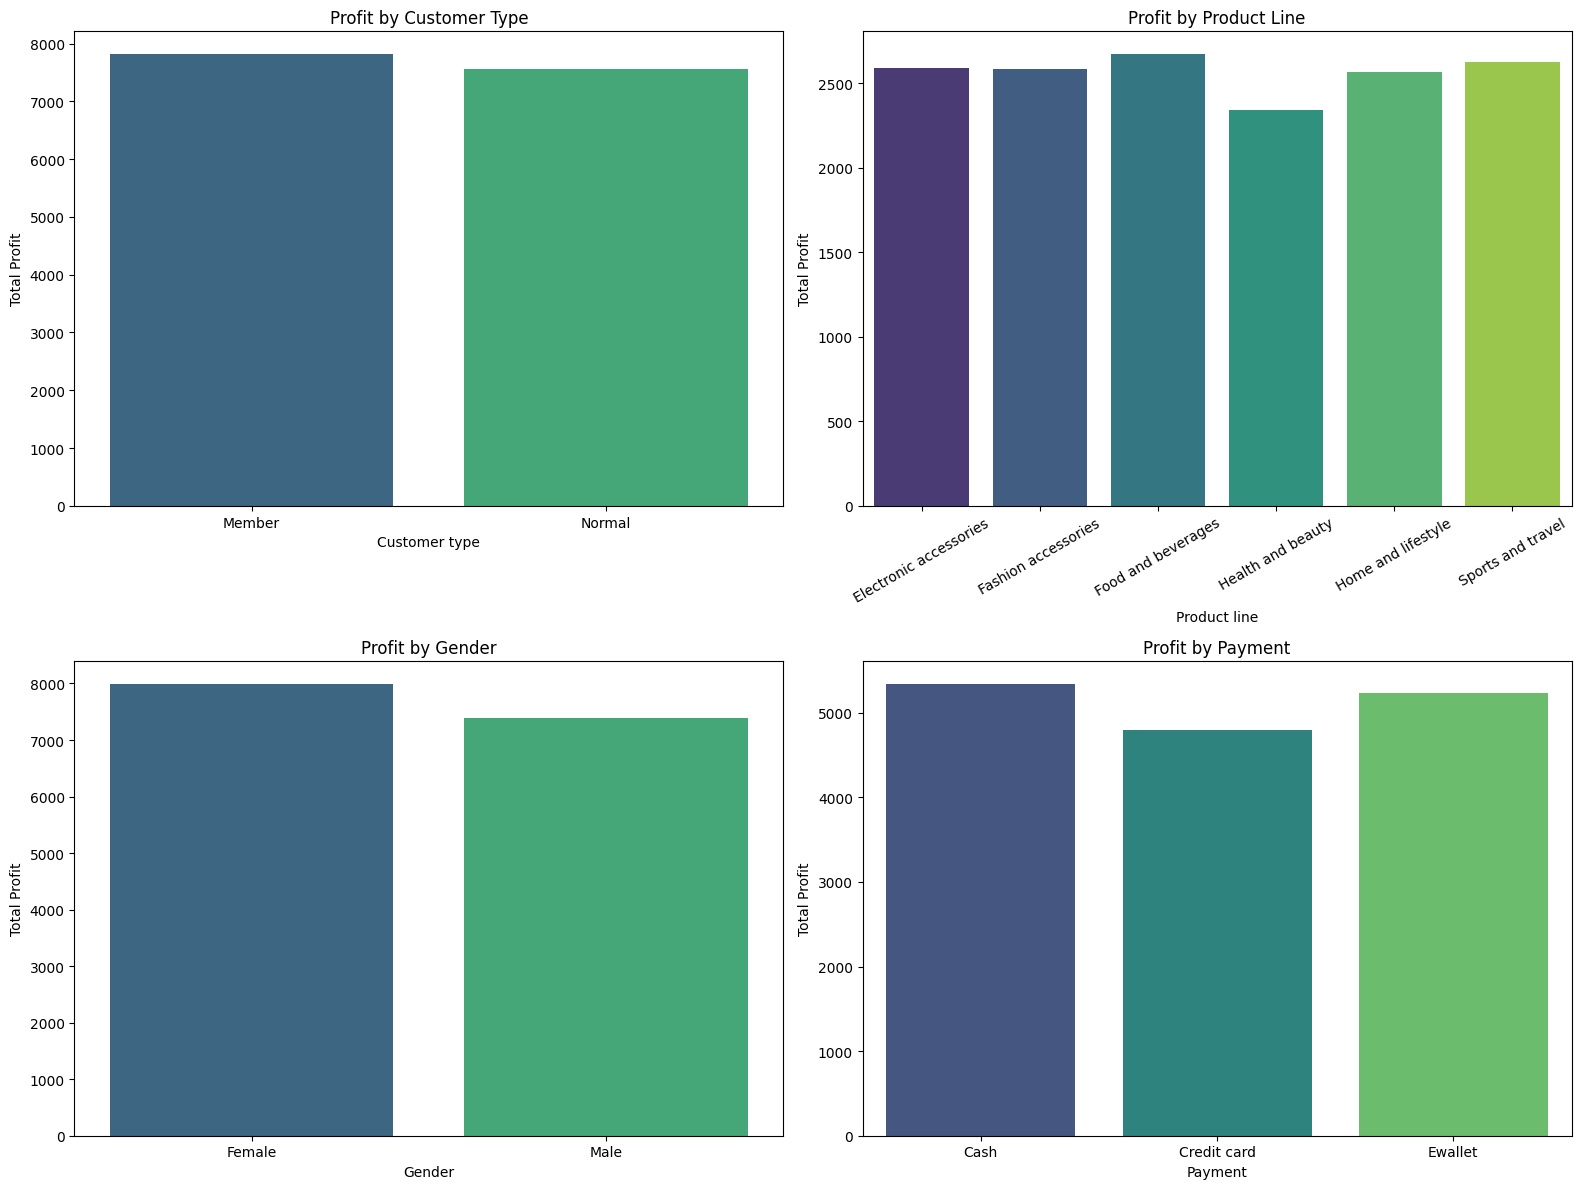

In [ ]:
profit_by_customer_type = df.groupby('Customer type')['gross income'].sum().reset_index()
profit_by_product_line = df.groupby('Product line')['gross income'].sum().reset_index()
profit_by_gender = df.groupby('Gender')['gross income'].sum().reset_index()
profit_by_payment = df.groupby('Payment')['gross income'].sum().reset_index()

# Plotting bar charts for each segment
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot for Customer Type
sns.barplot(x='Customer type', y='gross income', data=profit_by_customer_type, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Profit by Customer Type')
axes[0, 0].set_ylabel('Total Profit')

# Plot for Product Line
sns.barplot(x='Product line', y='gross income', data=profit_by_product_line, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Profit by Product Line')
axes[0, 1].set_ylabel('Total Profit')
# axes[0, 1].set_xticklabels(rotation=45, ha='right')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=30)

# Plot for Gender
sns.barplot(x='Gender', y='gross income', data=profit_by_gender, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Profit by Gender')
axes[1, 0].set_ylabel('Total Profit')

# Plot for Payment
sns.barplot(x='Payment', y='gross income', data=profit_by_payment, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Profit by Payment')
axes[1, 1].set_ylabel('Total Profit')

# Adjust layout
plt.tight_layout()
plt.show()

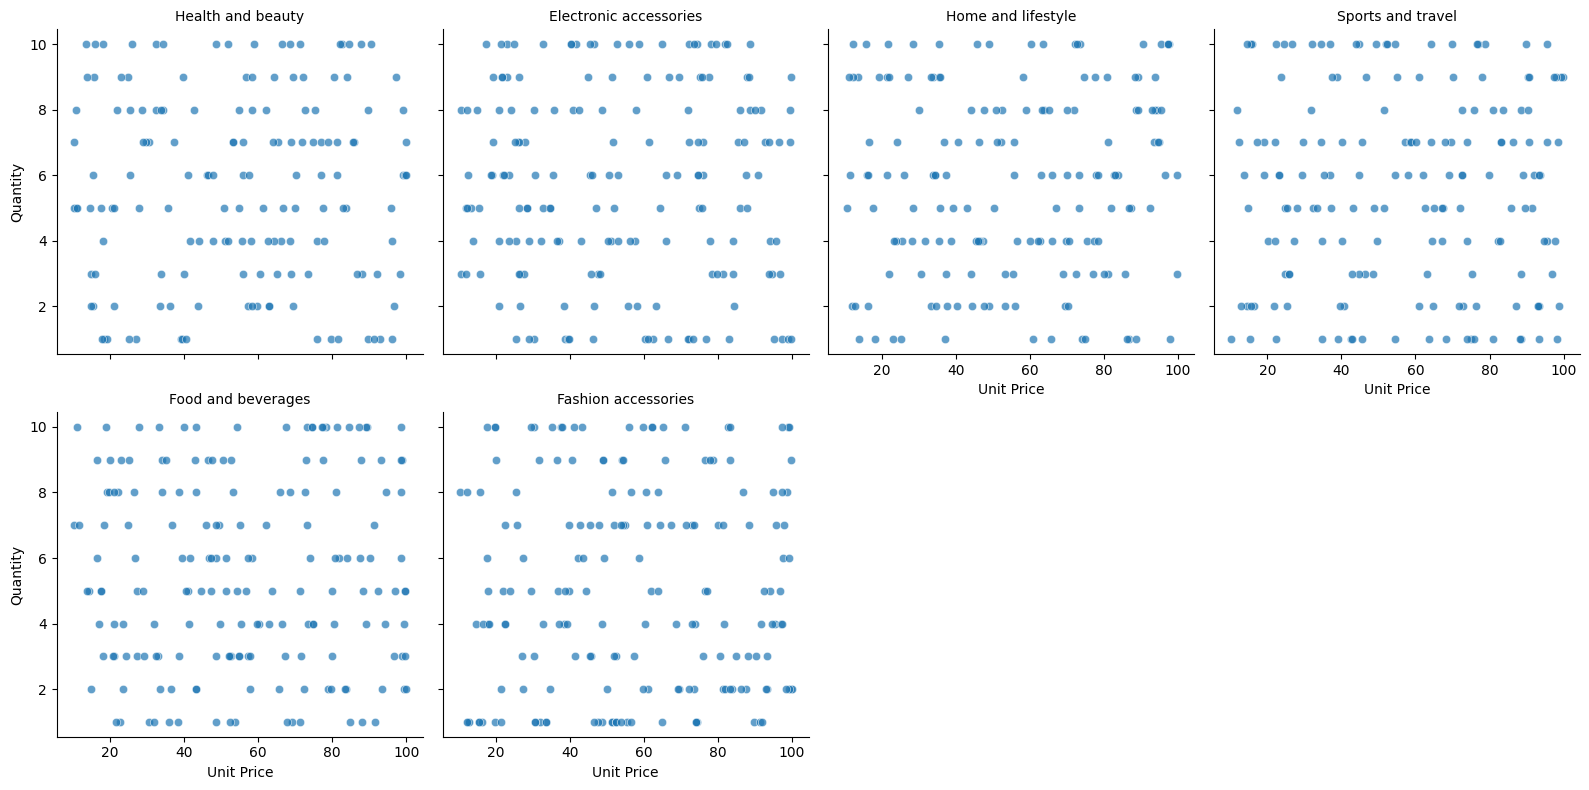

In [ ]:
g = sns.FacetGrid(df, col="Product line", col_wrap=4, height=4)
g.map(sns.scatterplot, "Unit price", "Quantity", alpha=0.7)

# Set titles and labels
g.set_axis_labels("Unit Price", "Quantity")
g.set_titles(col_template="{col_name}")
plt.show()

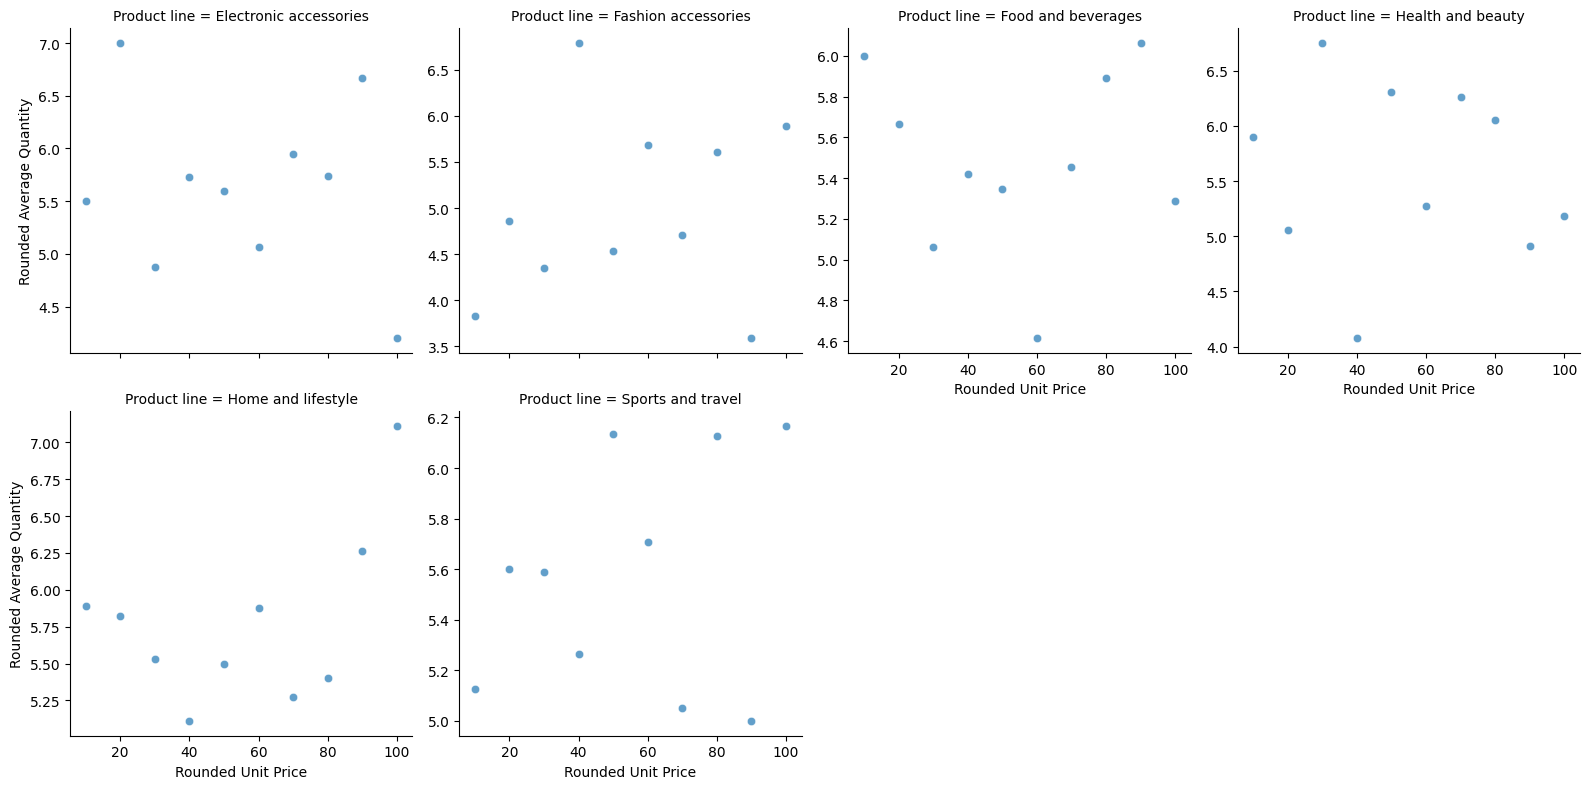

In [ ]:
# Calculate the rounded average Quantity for each Product line and rounded Unit price
df['Rounded Average Quantity'] = df['Quantity'].round()
df['Rounded Unit Price'] = (df['Unit price'] / 10).round() * 10  # Round to the nearest multiple of 10

# Calculate the average Quantity for each Product line and Unit price
avg_quantity_by_product_line_price = df.groupby(['Product line', 'Rounded Unit Price'])['Rounded Average Quantity'].mean().reset_index()

# Create a FacetGrid with Seaborn
g = sns.FacetGrid(avg_quantity_by_product_line_price, col="Product line", col_wrap=4, height=4, sharey=False)
g.map(sns.scatterplot, "Rounded Unit Price", "Rounded Average Quantity", alpha=0.7)
g.set_axis_labels("Rounded Unit Price", "Rounded Average Quantity")

# Adjust layout
plt.tight_layout()
plt.show()

<ipython-input-64-ffd1743a8cda>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(hue='Month', y='Total', x='Product line', data=df, ci=None, palette='viridis')


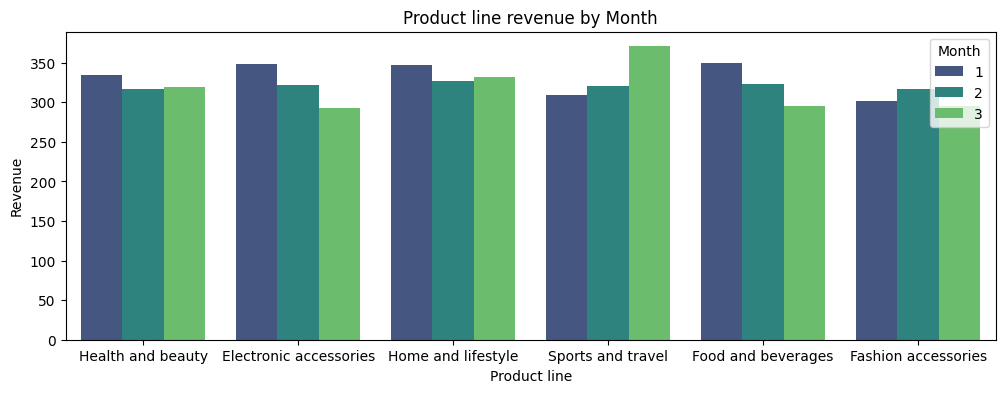

In [ ]:
# Tạo biểu đồ sức mua theo Product line, thống kê theo từng tháng
plt.figure(figsize=(12, 4))
sns.barplot(hue='Month', y='Total', x='Product line', data=df, ci=None, palette='viridis')
plt.title('Product line revenue by Month')
plt.xlabel('Product line')
plt.ylabel('Revenue')
plt.show()

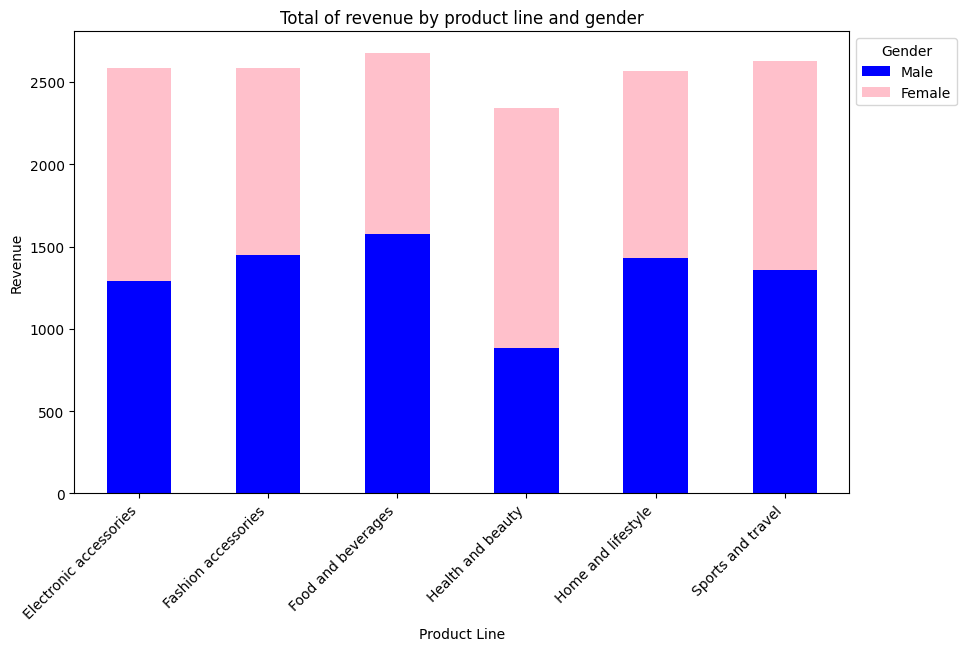

In [ ]:
sales_data = df.groupby(['Product line', 'Gender'])['gross income'].sum().unstack()

fig, ax = plt.subplots(figsize=(10, 6))
sales_data.plot(kind='bar', stacked=True, ax=ax, color=['blue', 'pink'])

plt.xlabel('Product Line')
plt.ylabel('Revenue')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks(rotation=45, ha='right')
plt.title('Total of revenue by product line and gender')
ax.legend(title='Gender', labels=['Male', 'Female'], loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Monthly revenue:
Month
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64


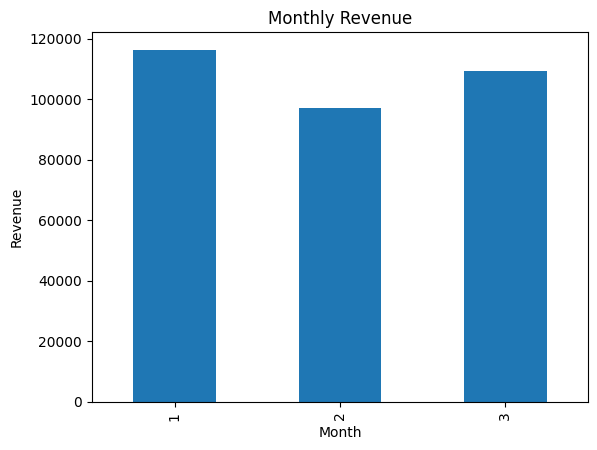

In [ ]:
monthly_revenue = df.groupby('Month')['Total'].sum()
print(f'Monthly revenue:\n{monthly_revenue}')
monthly_revenue.plot(kind='bar', xlabel='Month', ylabel='Revenue', title='Monthly Revenue')
plt.show()

Text(0.5, 1.0, 'Ratings by Branch')

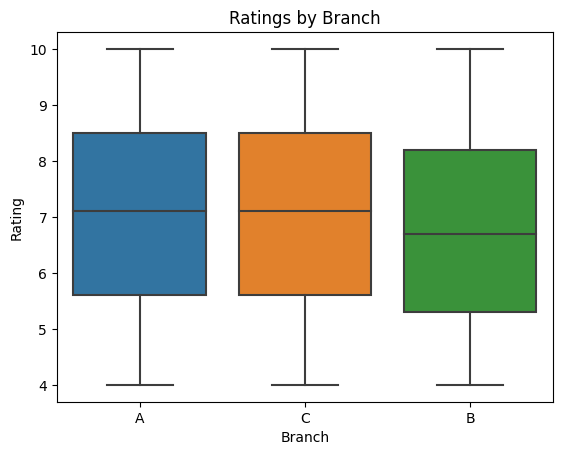

In [ ]:
 sns.boxplot(x="Branch", y = "Rating" ,data =df).set_title("Ratings by Branch")

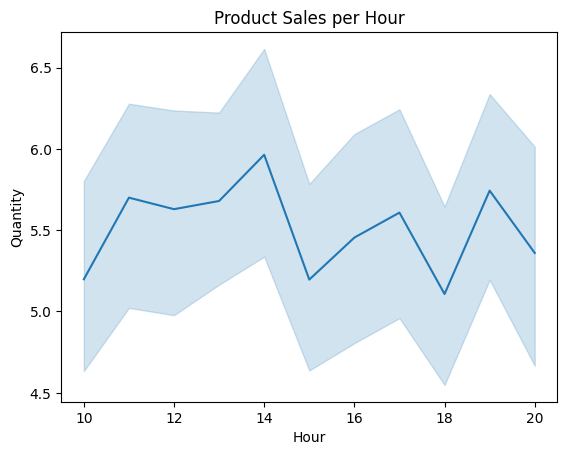

In [ ]:
sns.lineplot(x="Hour",  y = 'Quantity',data =df).set_title("Product Sales per Hour")

<Axes: xlabel='Total', ylabel='Product line'>

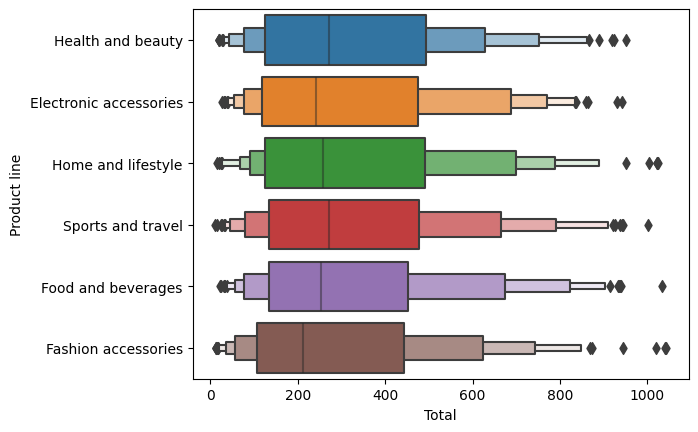

In [ ]:
sns.boxenplot(y = 'Product line', x = 'Total', data=df)

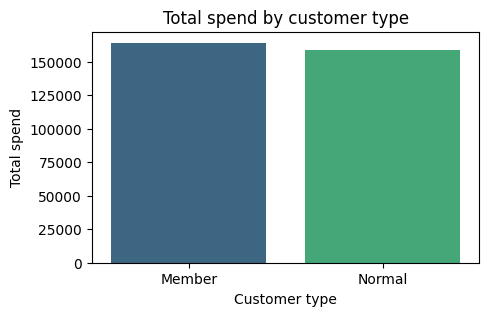

In [ ]:
category_counts = df.groupby('Customer type')['Total'].sum().reset_index()
plt.figure(figsize=(5, 3))
sns.barplot(x='Customer type', y='Total', data=category_counts, palette='viridis')

plt.xlabel('Customer type')
plt.ylabel('Total spend')
plt.title('Total spend by customer type')

plt.show()

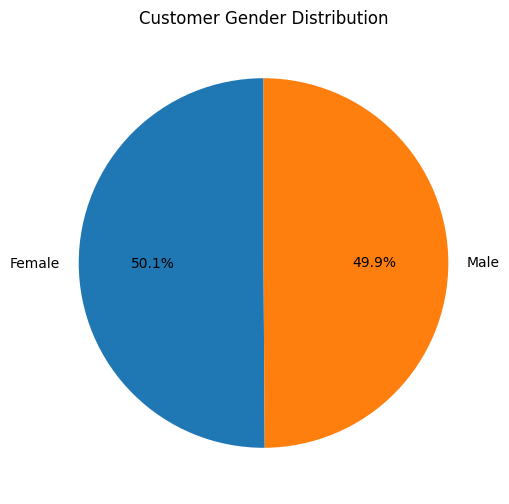

In [ ]:
customer_gender_distribution = df['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(customer_gender_distribution, labels=customer_gender_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Gender Distribution')
plt.show()

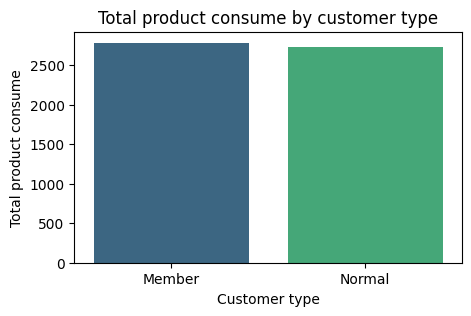

In [ ]:
Quantity = df.groupby('Customer type')['Quantity'].sum().reset_index()
plt.figure(figsize=(5, 3))
sns.barplot(x='Customer type', y='Quantity', data=Quantity, palette='viridis')

plt.xlabel('Customer type')
plt.ylabel('Total product consume')
plt.title('Total product consume by customer type')

plt.show()

In [ ]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,...,gross income,Rating,Day,Month,Year,Hour,ProfitMargin,DayOfWeek,Rounded Average Quantity,Rounded Unit Price
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,...,26.1415,9.1,5,1,2019,13,4.761905,Saturday,7,70.0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,...,3.8200,9.6,8,3,2019,10,4.761905,Friday,5,20.0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,...,16.2155,7.4,3,3,2019,13,4.761905,Sunday,7,50.0
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,...,23.2880,8.4,27,1,2019,20,4.761905,Sunday,8,60.0
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,...,30.2085,5.3,8,2,2019,10,4.761905,Friday,7,90.0
